## follow from this <a href='https://www.youtube.com/watch?v=Boo6SmgmHuM&index=4&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL'> Video </a>


In [9]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
mnistPath='/home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA'

In [10]:
def load_dataset(flaten=False,one_hot=True):
    def _make_one_hot(d,C=10):
        return (np.arange(C)==d[:,None]).astype(np.int32)

    mnist=input_data.read_data_sets(mnistPath)
    X_train,Y_train=mnist.train.images,mnist.train.labels
    X_test,Y_test=mnist.test.images,mnist.test.labels

    if flaten==False:
        X_train=X_train.reshape((-1,28,28,1))
        X_test = X_test.reshape((-1, 28, 28,1))
    if one_hot:
        Y_train = _make_one_hot(Y_train)
        Y_test=_make_one_hot(Y_test)


    print('\n-------------------------------------------------------------------------')
    print('load %d train Example,%d Test Example'%(X_train.shape[0],X_test.shape[0]))
    print('Train Images  Shape:'+str(X_train.shape))
    print('Train Labels  Shape:' + str(Y_train.shape))
    print('Test  Images  Shape:'+str(X_test.shape))
    print('Test  Labels  Shape:' + str(Y_test.shape))
    print('-------------------------------------------------------------------------')
    return (X_train,Y_train,X_test,Y_test)

In [11]:
X_train,Y_train,X_test,Y_test=load_dataset()

Extracting /home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA/train-images-idx3-ubyte.gz
Extracting /home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting /home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting /home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA/t10k-labels-idx1-ubyte.gz

-------------------------------------------------------------------------
load 55000 train Example,10000 Test Example
Train Images  Shape:(55000, 28, 28, 1)
Train Labels  Shape:(55000, 10)
Test  Images  Shape:(10000, 28, 28, 1)
Test  Labels  Shape:(10000, 10)
-------------------------------------------------------------------------


## course create a model,I just try a softmax linear model

In [12]:
import keras.backend as K
from keras.layers import Dense,Activation,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

Using TensorFlow backend.


some useful function in document:
<a href='https://keras.io/layers/core/#input'>Dense</a>  <a href='https://keras.io/layers/convolutional/#conv2d'>conv2d</a> 
<a href='https://keras.io/models/sequential/'>Sequential</a><a href=''></a>

In [13]:
def NN():
    model=Sequential([
            #the first layer need have a input_shape argument !!
            Dense(units=128,activation='relu',input_shape=(28*28,)),
            Dense(units=10,activation='softmax')
        ])
    model.summary()
    return model

In [14]:
model=NN()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## next step define optimizer and loss func,then train the model
useful function <a href='https://keras.io/losses/'>categorical_crossentropy<a>
### get rough 92% on validation set

In [15]:
#tell keras how to optimizer the loss
model.compile(optimizer=Adam(lr=0.01),loss=categorical_crossentropy,metrics=['accuracy'])
#train model
X_train,Y_train,X_test,Y_test=load_dataset(one_hot=True,flaten=True)
#train model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,shuffle=True,batch_size=128)

Extracting /home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA/train-images-idx3-ubyte.gz
Extracting /home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting /home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting /home/zhangxk/PycharmProjects/untitled/deepAI/daily/AI_database/mnist/MNIST_DATA/t10k-labels-idx1-ubyte.gz

-------------------------------------------------------------------------
load 55000 train Example,10000 Test Example
Train Images  Shape:(55000, 784)
Train Labels  Shape:(55000, 10)
Test  Images  Shape:(10000, 784)
Test  Labels  Shape:(10000, 10)
-------------------------------------------------------------------------
Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 36us/step - loss: 0.2261 - acc: 0.9311 - val_loss: 0.1545 - val_acc: 0.9501
Epoch 2/10
55000

## course 7 using prodiction

In [16]:
idx=80
# on test data set!
Y_pred_class=model.predict_classes(X_test) #shape mx1
Y_pred_prob=model.predict(X_test)     #shape mx10
Y_true=np.argmax(Y_test,axis=-1)  #shape m*10
print('True label:%d,Predict label %d,with prob %.3f'%(Y_true[idx],Y_pred_class[idx],Y_pred_prob[idx][Y_pred_class[idx]]))

True label:7,Predict label 7,with prob 1.000


## course 8,using confusion matrix show the result
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html'>hint</a>

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from common import plot_confusion_matrix
%matplotlib inline
plt.rcParams['figure.figsize']=(15,15)

In [18]:
cm=confusion_matrix(Y_true,Y_pred_class) #shape 10x10
# print(cm.shape)

Normalized confusion matrix


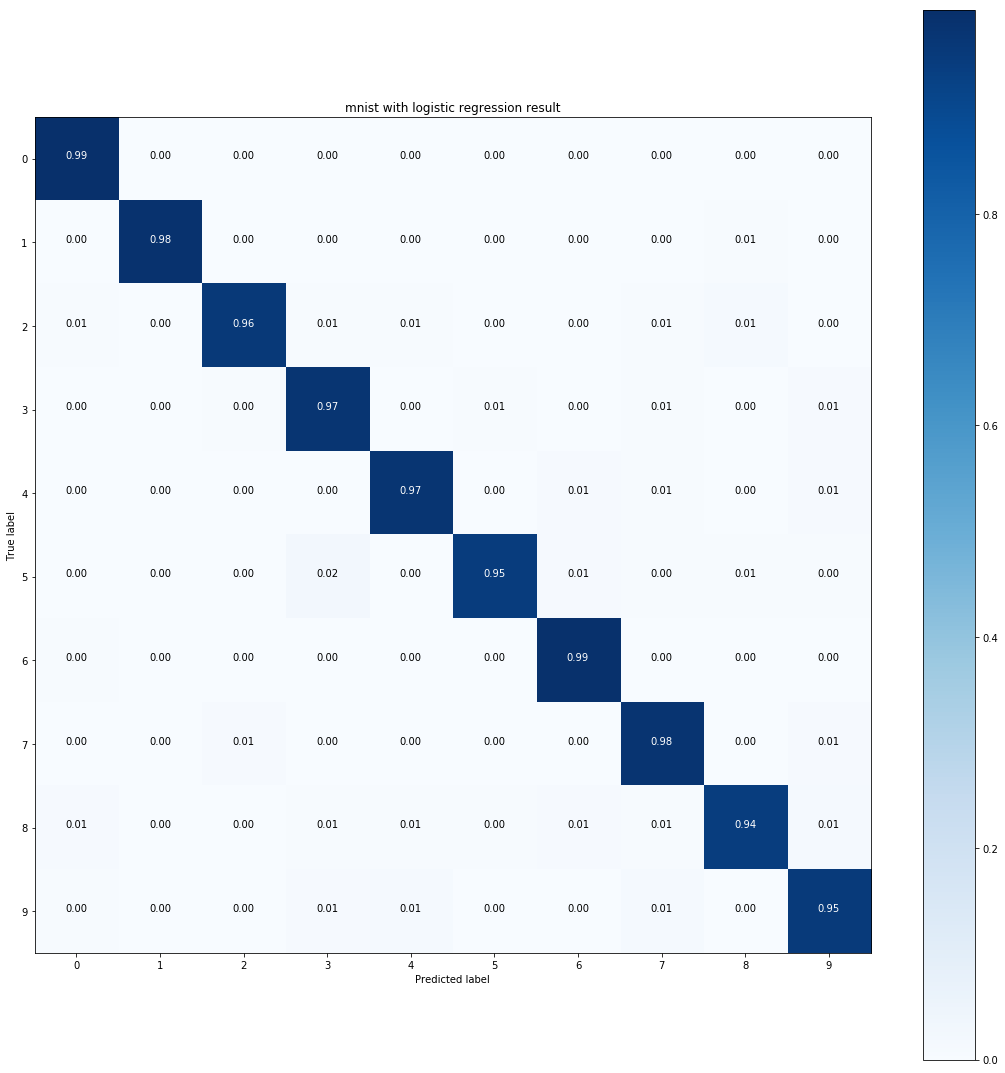

In [19]:
classes=[str(i) for i in range(10)]
plot_confusion_matrix(cm,classes,normalize=True,title='mnist with logistic regression result')

In [21]:
mask=Y_pred_class !=Y_true
X_error=X_test[mask]

### Now save the model

In [115]:
model.save('mnist.h5')

# Course 9 tell me how to load DataSet from dir

In [22]:
from keras.preprocessing.image import  ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy,categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from common import *
%matplotlib inline

In [24]:
def showDataset(X,Y,gridSize=(3,3)):
    '''
        show dog and cat image
        given X and Y,shape[m,h,w,c] and [m,2]
    '''
    m=X.shape[0]
    rows,cols=gridSize
    numExample=rows*cols


    for i in range(0,m,numExample):
        _X=X[i:i+numExample]
        _Y = Y[i:i + numExample]
        plt.figure(figsize=(10,10))
        for row in range(1,rows+1):
            for col in range(1,cols+1):
                picIndex=(row-1)*cols+col-1
                plt.subplot(rows,cols,(row-1)*cols+col)
                plt.axis('off')

                if(picIndex<_X.shape[0]):
                    plt.imshow(_X[picIndex])
                    y=np.argmax(_Y[picIndex])
                    plt.title(str(y),fontdict={'fontsize':20})

Found 18 images belonging to 2 classes.


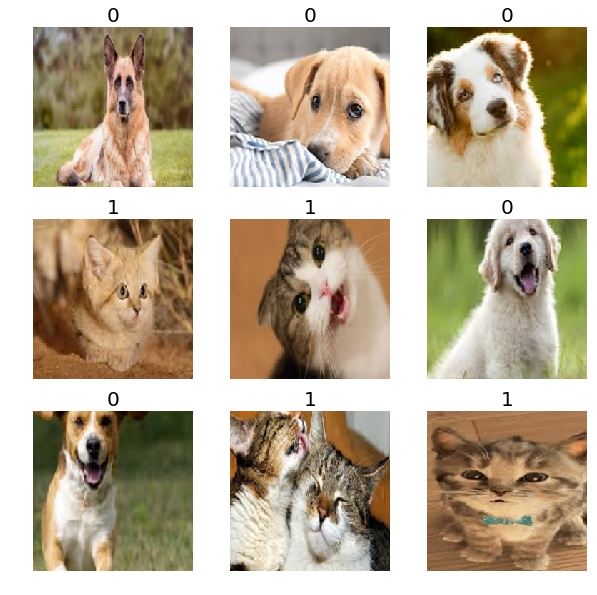

In [25]:
imagepath='dogs_cats'
gen=ImageDataGenerator(
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    zoom_range=[0.5,1.0],  #<1 mean zoom in,>1 zoom out  
    rescale=1/255.0   ,  #mul image by rescale
#     zca_whitening=True,
#     zca_epsilon=0.1
).flow_from_directory(imagepath,target_size=(224,224),classes=['dog','cat'],batch_size=9,seed=0)
imgs,labels=next(gen)
showDataset(imgs,labels)

imagepath='/home/zhangxk/PycharmProjects/untitled/daily/8/dogs_cats'
gen=ImageDataGenerator(
    rescale=1/255.0
).flow_from_directory(imagepath,target_size=(256,256),classes=['dog','cat'],batch_size=9,seed=0)
imgs,labels=next(gen)
showDataset(imgs,labels)

# Course 10 will define a poor convolution model,and train on DataSet

In [27]:
def dog_cat_model():
    model=Sequential([
            Conv2D(filters=64,kernel_size=7,strides=1,activation='relu',input_shape=(224,224,3)),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(2,activation='softmax')
        ])
    return model

In [28]:
model=dog_cat_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 218, 64)      9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 760384)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1520770   
Total params: 1,530,242
Trainable params: 1,530,242
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer=Adam(lr=0.0001),loss=categorical_crossentropy,metrics=['accuracy'])


In [30]:
model.fit_generator(gen,epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 737ms/step - loss: 2.9354 - acc: 0.3889
Epoch 2/5
2/2 [==============================] - 1s 586ms/step - loss: 1.1443 - acc: 0.6667
Epoch 3/5
2/2 [==============================] - 1s 602ms/step - loss: 3.4153 - acc: 0.5000
Epoch 4/5
2/2 [==============================] - 1s 588ms/step - loss: 0.7939 - acc: 0.5556
Epoch 5/5
2/2 [==============================] - 1s 601ms/step - loss: 2.0667 - acc: 0.5000


# so I have train model ,I use it to predict new images

In [36]:
x,y=next(gen)
y=np.argmax(y,axis=1)
yhat=model.predict_classes(x)
print(yhat)
print(y)
gen.class_indices


[0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 1 0 1 1]


{'cat': 1, 'dog': 0}

Confusion matrix, without normalization


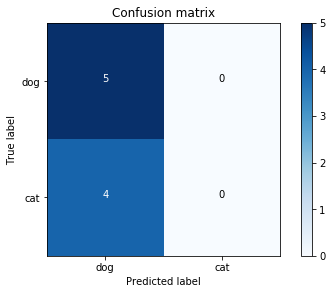

In [37]:
cm=confusion_matrix(y,yhat)
plot_confusion_matrix(cm,classes=['dog','cat'])

#  First let look as what VGG 16 struct
# Fine-tune VGG16 Image Classifier with Keras | Part 1: Build

In [38]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import  ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Input
from keras.optimizers import Adam
from keras.losses import binary_crossentropy,categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [39]:
vgg16_model=VGG16()
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Now transfer VGG to our Model

In [40]:
mycatdogmodel=Sequential()
for i in range(len(vgg16_model.layers)-1):
    vgg_layer=vgg16_model.layers[i]
    vgg_layer.trainable=False
    mycatdogmodel.add(vgg_layer)
# mycatdogmodel.pop()
mycatdogmodel.add(Dense(2,activation='softmax'))
mycatdogmodel.summary()
# print(mycatdogmodel)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [41]:
print(mycatdogmodel.layers)
# mycatdogmodel.add(Dense(2,activation='softmax'))
# mycatdogmodel.summary()
# mycatdogmodel.pop()


[<keras.layers.convolutional.Conv2D object at 0x7f7bbca39438>, <keras.layers.convolutional.Conv2D object at 0x7f7bbc9966d8>, <keras.layers.pooling.MaxPooling2D object at 0x7f7bbca4ff60>, <keras.layers.convolutional.Conv2D object at 0x7f7bbcc1ae48>, <keras.layers.convolutional.Conv2D object at 0x7f7bbeec7278>, <keras.layers.pooling.MaxPooling2D object at 0x7f7bbcd3c860>, <keras.layers.convolutional.Conv2D object at 0x7f7bbccc45c0>, <keras.layers.convolutional.Conv2D object at 0x7f7bbeeef550>, <keras.layers.convolutional.Conv2D object at 0x7f7bbce5fc18>, <keras.layers.pooling.MaxPooling2D object at 0x7f7bbccdc320>, <keras.layers.convolutional.Conv2D object at 0x7f7bbc9cabe0>, <keras.layers.convolutional.Conv2D object at 0x7f7bbcab1c50>, <keras.layers.convolutional.Conv2D object at 0x7f7bbcab45c0>, <keras.layers.pooling.MaxPooling2D object at 0x7f7bbeef4160>, <keras.layers.convolutional.Conv2D object at 0x7f7bbeee7dd8>, <keras.layers.convolutional.Conv2D object at 0x7f7bbce4a5c0>, <keras.

In [42]:
mycatdogmodel.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])
mycatdogmodel.fit_generator(gen,epochs=5)
# categorical_crossentropy

Epoch 1/5
2/2 [==============================] - 5s 2s/step - loss: 1.2622 - acc: 0.4444
Epoch 2/5
2/2 [==============================] - 4s 2s/step - loss: 0.6753 - acc: 0.5556
Epoch 3/5
2/2 [==============================] - 5s 2s/step - loss: 1.0763 - acc: 0.5000
Epoch 4/5
2/2 [==============================] - 4s 2s/step - loss: 0.5901 - acc: 0.7222
Epoch 5/5
2/2 [==============================] - 4s 2s/step - loss: 0.8456 - acc: 0.5000


Confusion matrix, without normalization


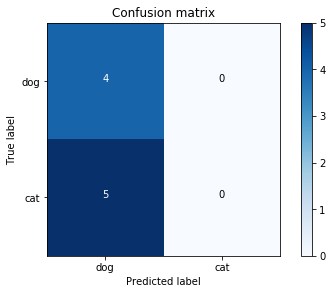

In [43]:
x_test,y_test=next(gen)
y_hat=mycatdogmodel.predict_classes(x_test)

cm=confusion_matrix(np.argmax(y_test,axis=1),y_hat)
plot_confusion_matrix(cm,classes=['dog','cat'])